In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [17]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Masktest/New Masks Dataset",target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='binary',subset='training')

Found 412 images belonging to 2 classes.


In [18]:
val_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Masktest/New Masks Dataset",target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='binary',subset='validation')

Found 102 images belonging to 2 classes.


In [19]:
model = keras.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(IMG_SIZE, IMG_SIZE, 3)),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


In [22]:
model.fit(train_generator, epochs=5, validation_data=val_generator,batch_size= BATCH_SIZE)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 79s 6s/step - accuracy: 0.6165 - loss: 1.0012 - val_accuracy: 0.8039 - val_loss: 0.5527
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.8053 - loss: 0.4975 - val_accuracy: 0.8039 - val_loss: 0.5010
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.8211 - loss: 0.4339 - val_accuracy: 0.8039 - val_loss: 0.5091
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.8118 - loss: 0.3940 - val_accuracy: 0.4020 - val_loss: 0.7045
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 60s 5s/step - accuracy: 0.8632 - loss: 0.3266 - val_accuracy: 0.7059 - val_loss: 0.6532


In [28]:
model.save('/content/drive/MyDrive/brain/Maskdetection.h5')

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt #visualisation
import numpy as np
model = load_model('/content/drive/MyDrive/brain/Maskdetection.h5')
print("Model is Loaded")

Model is Loaded


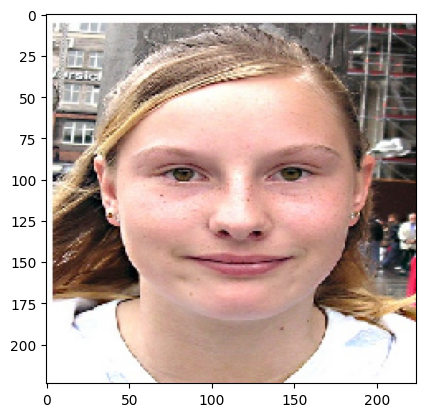

In [30]:
test_image_path='/content/drive/MyDrive/Masktest/New Masks Dataset/Train/Non Mask/100.jpg'
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [26]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255.
prediction = model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
[[0.9970169]]


In [37]:
if prediction <= 0.5:
 print("Patient is with mask")
else:
 print("Patient is without mask")

Patient is without mask
